In [1]:
from __future__ import print_function

In [48]:
#data handling/prediction
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.externals.six import StringIO
import os

#visualization
%matplotlib inline
import seaborn as sns
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

In [3]:
#Read in the train data 
DATA_DIR = os.path.join("..","lol_project_home_pricing", "data")
DATA_DIR = os.path.abspath(DATA_DIR)

In [4]:
house_data  = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))


house_data_features = house_data.columns.get_values()
house_data_features = house_data_features.tolist()
print (house_data_features)


['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [5]:
house_data.shape

(1460, 81)

In [6]:
print (house_data_features)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [7]:
#house_data_columns = house_data_features[:3] + house_data_features[4:5] + house_data_features[17:21]+house_data_features[34:35]
#+house_data_features[36:39]+
#house_data_columns
# started sorting the data by data type then found sort_values which did it automatically 



In [8]:
house_data_columns = house_data.dtypes.sort_values()


In [9]:
house_data.dtypes[40:]

HeatingQC         object
CentralAir        object
Electrical        object
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64
GarageFinish      object
GarageCars         int64
GarageArea         int64
GarageQual        object
GarageCond        object
PavedDrive        object
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
PoolQC            object
Fence             object
MiscFeature       object
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object


In [10]:
cols = list(house_data.columns.values)

In [11]:
house_data = house_data[['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']]

In [12]:
house_data_columns = ['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [13]:
house_data.dtypes[:40]

Id                 int64
MSSubClass         int64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
LotFrontage      float64
MasVnrArea       float64
GarageYrBlt      float64
MSZoning          object
Street            object


In [14]:
# Replace all the missing categorical data with "missing" creating an additional factor for the model. 
house_data_category_missing = house_data[house_data_columns[38:]].fillna("missing")
house_data_category_missing.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,missing,missing,missing,WD,Normal
1,RL,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,missing,missing,missing,WD,Normal
2,RL,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,missing,missing,missing,WD,Normal
3,RL,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,missing,missing,missing,WD,Abnorml
4,RL,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,missing,missing,missing,WD,Normal


In [15]:
house_data_category_filled = house_data_category_missing[house_data_columns[38:]]

In [16]:
# use get_dummies to convert a categorical feature the models can understand 
house_data_dummies = pd.get_dummies(house_data_category_filled,drop_first=True).astype(int)
house_data_dummies

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,Alley_missing,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,0,0,1,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
7,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8,0,0,0,1,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
9,0,0,1,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [17]:
#house_data= house_data.LotFrontage.astype(int)


In [18]:
house_data.MasVnrArea.mean()

103.68526170798899

In [19]:
# replace missing float values with the mean of the rest of the data. 
mean_per_column = house_data[house_data_columns[35:38]].apply(
    lambda x: x.mean(), axis=0)
mean_per_column = mean_per_column.round(decimals=0)

house_data_float_missing = house_data[house_data_columns[35:38]].fillna(mean_per_column,axis=0)
house_data_float_missing.head()


,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0


A quick look at the data shows that I am going to have to do some feature engineering. It is clear that there are a lot of NaN values as well as features that contain objects that will have to be converted to integers. 

In [20]:
# checking for nulls in data set 

house_data.isnull().sum()[0:40]


Id                 0
MSSubClass         0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
LotFrontage      259
MasVnrArea         8
GarageYrBlt       81
MSZoning           0
Street             0
dtype: int64

In [21]:
house_data.shape

(1460, 81)

In [22]:
house_data_nonull = house_data[house_data_columns[:35]]
house_data_nonull.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [23]:
# Create a new DF by concat the feature engineered df with the non fetaure engineered df
house_data_feature_engineered = pd.concat([house_data_nonull,house_data_float_missing,house_data_dummies],axis=1)

In [24]:
# a feature engineereed data set ready to run some modeling on 
house_data_feature_engineered.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,0,1,0,0,0,1,0


Below I am going to do some practice with decision tree's. This will most likely not be my final project. I would ultimatly like to use a random forest model to predict the sale price of a home. 

In [25]:
#create a list of features that will be used in the model. 
house_data_engineered_col = house_data_feature_engineered.columns.get_values()
house_data_engineered_col = house_data_engineered_col.tolist()
house_data_engineered_col

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'Alley_Pave',
 'Alley_missing',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighbo

In [26]:
# rearrange the data frame so sale price is on the end
house_data_feature_engineered = house_data_feature_engineered[['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'Alley_Pave',
 'Alley_missing',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofStyle_Mansard',
 'RoofStyle_Shed',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_ImStucc',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stone',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior1st_WdShing',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_ImStucc',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Other',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stone',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'Exterior2nd_Wd Shng',
 'MasVnrType_BrkFace',
 'MasVnrType_None',
 'MasVnrType_Stone',
 'MasVnrType_missing',
 'ExterQual_Fa',
 'ExterQual_Gd',
 'ExterQual_TA',
 'ExterCond_Fa',
 'ExterCond_Gd',
 'ExterCond_Po',
 'ExterCond_TA',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Slab',
 'Foundation_Stone',
 'Foundation_Wood',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtQual_missing',
 'BsmtCond_Gd',
 'BsmtCond_Po',
 'BsmtCond_TA',
 'BsmtCond_missing',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_No',
 'BsmtExposure_missing',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtFinType1_missing',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_GLQ',
 'BsmtFinType2_LwQ',
 'BsmtFinType2_Rec',
 'BsmtFinType2_Unf',
 'BsmtFinType2_missing',
 'Heating_GasA',
 'Heating_GasW',
 'Heating_Grav',
 'Heating_OthW',
 'Heating_Wall',
 'HeatingQC_Fa',
 'HeatingQC_Gd',
 'HeatingQC_Po',
 'HeatingQC_TA',
 'CentralAir_Y',
 'Electrical_FuseF',
 'Electrical_FuseP',
 'Electrical_Mix',
 'Electrical_SBrkr',
 'Electrical_missing',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'Functional_Maj2',
 'Functional_Min1',
 'Functional_Min2',
 'Functional_Mod',
 'Functional_Sev',
 'Functional_Typ',
 'FireplaceQu_Fa',
 'FireplaceQu_Gd',
 'FireplaceQu_Po',
 'FireplaceQu_TA',
 'FireplaceQu_missing',
 'GarageType_Attchd',
 'GarageType_Basment',
 'GarageType_BuiltIn',
 'GarageType_CarPort',
 'GarageType_Detchd',
 'GarageType_missing',
 'GarageFinish_RFn',
 'GarageFinish_Unf',
 'GarageFinish_missing',
 'GarageQual_Fa',
 'GarageQual_Gd',
 'GarageQual_Po',
 'GarageQual_TA',
 'GarageQual_missing',
 'GarageCond_Fa',
 'GarageCond_Gd',
 'GarageCond_Po',
 'GarageCond_TA',
 'GarageCond_missing',
 'PavedDrive_P',
 'PavedDrive_Y',
 'PoolQC_Fa',
 'PoolQC_Gd',
 'PoolQC_missing',
 'Fence_GdWo',
 'Fence_MnPrv',
 'Fence_MnWw',
 'Fence_missing',
 'MiscFeature_Othr',
 'MiscFeature_Shed',
 'MiscFeature_TenC',
 'MiscFeature_missing',
 'SaleType_CWD',
 'SaleType_Con',
 'SaleType_ConLD',
 'SaleType_ConLI',
 'SaleType_ConLw',
 'SaleType_New',
 'SaleType_Oth',
 'SaleType_WD',
 'SaleCondition_AdjLand',
 'SaleCondition_Alloca',
 'SaleCondition_Family',
 'SaleCondition_Normal',
 'SaleCondition_Partial','SalePrice']]
house_data_feature_engineered.shape

(1460, 263)

In [27]:
from sklearn.preprocessing import StandardScaler

In [39]:
house_data_engineered_col = house_data_engineered_col[1:262]

In [40]:
X,y = StandardScaler().fit_transform(house_data_feature_engineered[house_data_engineered_col]), house_data_feature_engineered.SalePrice

In [41]:


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.4, random_state=1234)


In [42]:
decision_tree = DecisionTreeRegressor(max_depth = 17)
decision_tree.fit(X_train,y_train)
print("Decision Tree RMSE:",
      np.sqrt(mean_squared_error(y_test, decision_tree.predict(X_test))))

Decision Tree RMSE: 2547.93569143


Decision Tree Train/Test RMSE: 53748.022028   43365.8842657
Decision Tree Train/Test RMSE: 31855.9847221   26279.1426491
Decision Tree Train/Test RMSE: 16268.466169   14325.2657126
Decision Tree Train/Test RMSE: 8033.8124664   7579.97832795
Decision Tree Train/Test RMSE: 3803.61852446   4034.33180872
Decision Tree Train/Test RMSE: 1816.9606678   2946.37703908
Decision Tree Train/Test RMSE: 757.921836021   2544.43728954
Decision Tree Train/Test RMSE: 320.854865118   2849.48984171
Decision Tree Train/Test RMSE: 111.385998162   2556.79167658
Decision Tree Train/Test RMSE: 27.4130869744   1937.44333879
Decision Tree Train/Test RMSE: 3.65468673894   2025.21870003
Decision Tree Train/Test RMSE: 0.0   2815.73644136
Decision Tree Train/Test RMSE: 0.0   2815.73644136
Decision Tree Train/Test RMSE: 0.0   2815.73644136
Decision Tree Train/Test RMSE: 0.0   2815.73644136
Decision Tree Train/Test RMSE: 0.0   2815.73644136
Decision Tree Train/Test RMSE: 0.0   2815.73644136
Decision Tree Train/Test RM

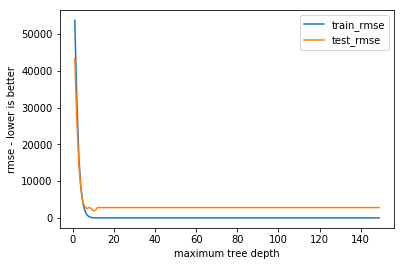

In [43]:
depths = range(1, 150)
train_rmse, test_rmse = [], []
for depth in depths:
    decision_tree = DecisionTreeRegressor(max_depth=depth, random_state=10)
    decision_tree.fit(X_train, y_train)
    curr_train_rmse = np.sqrt(
        mean_squared_error(y_train, decision_tree.predict(X_train)))
    curr_test_rmse = np.sqrt(
        mean_squared_error(y_test, decision_tree.predict(X_test)))
    
    print("Decision Tree Train/Test RMSE:", curr_train_rmse, " ",
          curr_test_rmse)
    
    train_rmse.append(curr_train_rmse)
    test_rmse.append(curr_test_rmse)
sns.mpl.pyplot.plot(depths, train_rmse, label='train_rmse')
sns.mpl.pyplot.plot(depths, test_rmse, label='test_rmse')
sns.mpl.pyplot.xlabel("maximum tree depth")
sns.mpl.pyplot.ylabel("rmse - lower is better")
sns.mpl.pyplot.legend()

In [44]:
pd.DataFrame({'feature':house_data_engineered_col, 'importance':decision_tree.feature_importances_}).sort_values(
    by='importance', ascending=False)

,feature,importance
33,SalePrice,9.918128e-01
13,GrLivArea,6.959774e-03
35,MasVnrArea,7.608174e-04
36,GarageYrBlt,1.299333e-04
72,Neighborhood_NridgHt,8.619010e-05
101,HouseStyle_1Story,5.724127e-05
1,LotArea,3.429178e-05
177,BsmtFinType1_GLQ,3.327433e-05
23,GarageArea,2.965342e-05
10,1stFlrSF,2.089909e-05


Ok. So what we can see from creating a simple decision tree is that this will not be a good model to use for this use case. The RMSE is incredibly high, and the importance of each feature is incredibly low in some case down to the -9th. So let's try and do a random forest model. 

In [46]:
#component matrix to reduce the number of features. 
pca = PCA()
transformed_pca_x = pca.fit_transform(house_data_feature_engineered[house_data_engineered_col])
#create component indices
component_names = ["component_"+str(comp) for comp in range(1, len(pca.explained_variance_)+1)]

#generate new component dataframe
transformed_pca_x = pd.DataFrame(transformed_pca_x,columns=component_names)
transformed_pca_x.head()

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_252,component_253,component_254,component_255,component_256,component_257,component_258,component_259,component_260,component_261
0,27493.441001,-2994.831783,-300.727974,734.138770,-146.025450,66.591360,-175.370668,-13.943181,-73.419655,12.675384,...,-0.000643,-0.000264,5.564224e-11,9.002822e-13,-6.238914e-12,1.013152e-11,7.859860e-12,-7.318216e-12,4.776859e-12,4.529580e-14
1,547.640220,-930.897686,738.428560,242.344622,-41.201176,27.144638,-81.162115,13.627417,81.972840,-98.379360,...,0.000695,0.000507,-2.384134e-11,5.743718e-12,-1.012088e-11,1.293121e-12,-1.661873e-12,1.048387e-11,9.308057e-14,-7.591313e-13
2,42579.377555,-702.826725,-481.291919,418.231354,-117.298719,-45.464337,-157.960133,-14.618171,-85.815575,-37.462625,...,-0.001246,-0.000904,4.554025e-11,-2.814914e-12,-7.364671e-12,-2.103457e-11,-3.934625e-12,-1.573566e-11,-4.953334e-13,1.101666e-12
3,-40929.822620,408.340970,-578.907515,102.389287,-79.185256,301.202614,-2.732994,-92.180375,-144.917723,-182.753201,...,-0.002744,0.000563,7.333175e-12,-9.952866e-13,-5.455308e-12,1.482489e-12,1.315060e-12,-1.137052e-11,4.301047e-12,-1.564161e-13
4,69169.681554,1417.440553,-525.455930,376.854925,-102.957753,348.811191,-169.633396,-96.916274,-281.952789,2.653580,...,0.000305,-0.001249,-8.626431e-12,3.397393e-12,-6.238268e-12,4.858767e-12,-6.887304e-12,1.260947e-11,5.681114e-12,-1.264661e-13


Text(0,0.5,u'eigenvalue')

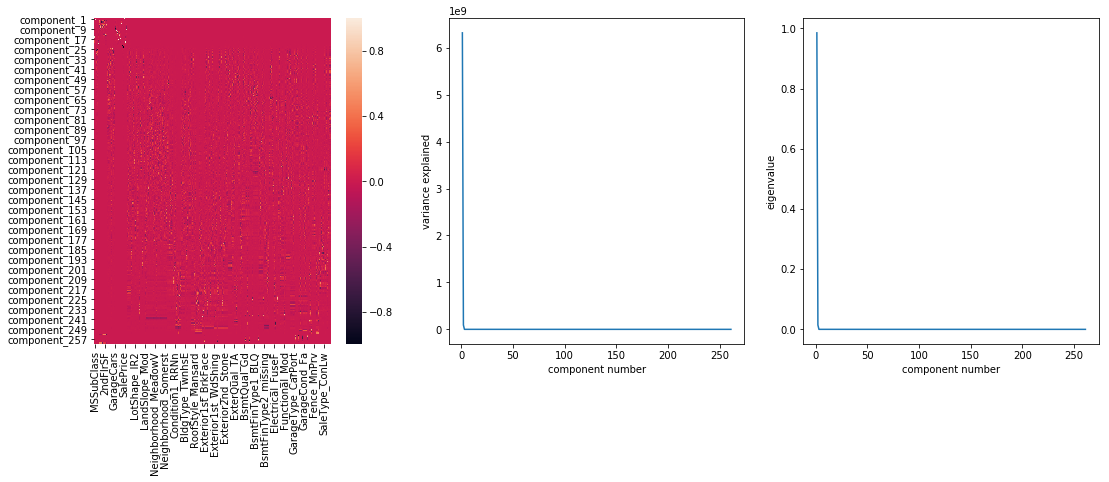

In [47]:
#generate component loadings on original features
component_matrix = pd.DataFrame(pca.components_,index=component_names,columns = house_data_engineered_col)
#add additional columns to describe what
component_matrix["explained_variance_ratio"] = pca.explained_variance_ratio_
component_matrix["eigenvalue"] = pca.explained_variance_
figure = sns.mpl.pyplot.figure(figsize=(18,6))
#add 3 subplots one at a time

#first the component matrix
figure.add_subplot(131)
sns.heatmap(component_matrix.iloc[:,:-2])

#then the eigenvalues
figure.add_subplot(132)
sns.mpl.pyplot.plot(range(1,component_matrix.shape[0]+1), component_matrix.eigenvalue)
sns.mpl.pyplot.xlabel("component number")
sns.mpl.pyplot.ylabel("variance explained")

#then the explained variance ratio
figure.add_subplot(133)
sns.mpl.pyplot.plot(range(1,component_matrix.shape[0]+1), component_matrix.explained_variance_ratio)
sns.mpl.pyplot.xlabel("component number")
sns.mpl.pyplot.ylabel("eigenvalue")

In [36]:
component_matrix.explained_variance_ratio.cumsum()

component_1      0.985340
component_2      0.999780
component_3      0.999834
component_4      0.999879
component_5      0.999917
component_6      0.999947
component_7      0.999974
component_8      0.999982
component_9      0.999987
component_10     0.999991
component_11     0.999995
component_12     0.999997
component_13     0.999998
component_14     0.999998
component_15     0.999999
component_16     0.999999
component_17     0.999999
component_18     1.000000
component_19     1.000000
component_20     1.000000
component_21     1.000000
component_22     1.000000
component_23     1.000000
component_24     1.000000
component_25     1.000000
component_26     1.000000
component_27     1.000000
component_28     1.000000
component_29     1.000000
component_30     1.000000
                   ...   
component_233    1.000000
component_234    1.000000
component_235    1.000000
component_236    1.000000
component_237    1.000000
component_238    1.000000
component_239    1.000000
component_24

In [37]:
house_data_feature_engineered.corr()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
Id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.005024,-0.005968,-0.007940,...,-0.020738,-0.018998,0.038920,0.026133,-0.034852,-0.009018,0.004865,0.015881,-0.020738,-0.021917
MSSubClass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,-0.140759,...,0.014005,-0.045156,-0.014555,0.026359,0.016241,0.030002,0.000983,0.024359,-0.051068,-0.084284
LotArea,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618,...,-0.015040,0.020039,-0.005722,-0.002292,-0.013208,0.008966,-0.010781,0.005711,0.022635,0.263843
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,...,-0.021172,0.327412,-0.057962,-0.225013,-0.041677,-0.044950,-0.025515,-0.143282,0.323295,0.790982
OverallCond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841,...,-0.019779,-0.156175,-0.050663,0.163684,-0.038888,-0.033444,-0.023873,0.161642,-0.151659,-0.077856
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,...,-0.023431,0.346954,0.012122,-0.238463,-0.045601,-0.010104,-0.035785,-0.158427,0.343895,0.522897
YearRemodAdd,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,0.181133,...,-0.039952,0.325647,-0.011431,-0.182733,-0.040294,-0.020727,-0.048056,-0.120577,0.322837,0.507101
BsmtFinSF1,-0.005024,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,-0.495251,...,-0.017825,0.044883,0.010652,-0.024778,-0.014874,0.021369,0.000765,-0.019560,0.044912,0.386420
BsmtFinSF2,-0.005968,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,-0.209294,...,0.035715,-0.087162,-0.013098,0.036178,-0.015130,-0.026277,-0.007929,0.041207,-0.085761,-0.011378
BsmtUnfSF,-0.007940,-0.140759,-0.002618,0.308159,-0.136841,0.149040,0.181133,-0.495251,-0.209294,1.000000,...,-0.033900,0.249236,-0.002593,-0.198960,-0.034618,-0.059130,0.021534,-0.153930,0.249315,0.214479


In [38]:
target_name = house_data_feature_engineered.columns.tolist()[-1]

In [77]:
X_sale = house_data_feature_engineered[house_data_engineered_col]
y_sale = house_data_feature_engineered.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X_sale, y_sale, test_size=0.4)

#scaler 
scaler = StandardScaler()
scaler.fit(X_train)

#transform
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#pca fit
pca = PCA()

pca.fit(X_train_scaled)

#pca transform 
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#RF regressor model
rf_sale = RandomForestRegressor(n_estimators=500, bootstrap=True,oob_score=True, random_state=1234)
rf_sale.fit(X_train_pca, y_train)
y_pred_rf_sale = rf_sale.predict(X_test_pca)
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf_sale)))

Random Forest RMSE: 30493.0310876


In [78]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
predicted_train = rf_sale.predict(X_train_pca)
predicted_test = rf_sale.predict(X_test_pca)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
print (test_score)
print (spearman)
#print (pearson)

0.846964306574
SpearmanrResult(correlation=0.93185571384158683, pvalue=1.9789437420543215e-258)


In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": [100,200, 500],
    "max_depth": [3,5,10,100, None],
    "max_features": [10, 30, 50, 100,200,all],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [True, False]}

model = RandomForestRegressor(random_state=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid.fit(X_train_pca, y_train)

print(grid.best_score_)
print(grid.best_params_)

JoblibTypeError: JoblibTypeError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    169     pkg_name = mod_name.rpartition('.')[0]
    170     main_globals = sys.modules["__main__"].__dict__
    171     if alter_argv:
    172         sys.argv[0] = fname
    173     return _run_code(code, main_globals, None,
--> 174                      "__main__", fname, loader, pkg_name)
        fname = '/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py'
        loader = <pkgutil.ImpLoader instance>
        pkg_name = ''
    175 
    176 def run_module(mod_name, init_globals=None,
    177                run_name=None, alter_sys=False):
    178     """Execute a module's code without importing it

...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/runpy.py in _run_code(code=<code object <module> at 0x109155230, file "/Use...2.7/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__builtins__': <module '__builtin__' (built-in)>, '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': '', 'app': <module 'ipykernel.kernelapp' from '/Users/derek...python2.7/site-packages/ipykernel/kernelapp.pyc'>, 'sys': <module 'sys' (built-in)>}, init_globals=None, mod_name='__main__', mod_fname='/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py', mod_loader=<pkgutil.ImpLoader instance>, pkg_name='')
     67         run_globals.update(init_globals)
     68     run_globals.update(__name__ = mod_name,
     69                        __file__ = mod_fname,
     70                        __loader__ = mod_loader,
     71                        __package__ = pkg_name)
---> 72     exec code in run_globals
        code = <code object <module> at 0x109155230, file "/Use...2.7/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__builtins__': <module '__builtin__' (built-in)>, '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': '', 'app': <module 'ipykernel.kernelapp' from '/Users/derek...python2.7/site-packages/ipykernel/kernelapp.pyc'>, 'sys': <module 'sys' (built-in)>}
     73     return run_globals
     74 
     75 def _run_module_code(code, init_globals=None,
     76                     mod_name=None, mod_fname=None,

...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {u'allow_stdin': True, u'code': u'from sklearn.ensemble import RandomForestRegre...rint(grid.best_score_)\nprint(grid.best_params_)', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {u'date': datetime.datetime(2018, 2, 22, 3, 12, 42, 435779, tzinfo=tzutc()), u'msg_id': u'12D91525D157484CB76791DE8E5B83EA', u'msg_type': u'execute_request', u'session': u'6712E3622C974910AA978EA3FDCDDD1D', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'12D91525D157484CB76791DE8E5B83EA', 'msg_type': u'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method IPythonKernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = ['6712E3622C974910AA978EA3FDCDDD1D']
        msg = {'buffers': [], 'content': {u'allow_stdin': True, u'code': u'from sklearn.ensemble import RandomForestRegre...rint(grid.best_score_)\nprint(grid.best_params_)', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {u'date': datetime.datetime(2018, 2, 22, 3, 12, 42, 435779, tzinfo=tzutc()), u'msg_id': u'12D91525D157484CB76791DE8E5B83EA', u'msg_type': u'execute_request', u'session': u'6712E3622C974910AA978EA3FDCDDD1D', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'12D91525D157484CB76791DE8E5B83EA', 'msg_type': u'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=['6712E3622C974910AA978EA3FDCDDD1D'], parent={'buffers': [], 'content': {u'allow_stdin': True, u'code': u'from sklearn.ensemble import RandomForestRegre...rint(grid.best_score_)\nprint(grid.best_params_)', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {u'date': datetime.datetime(2018, 2, 22, 3, 12, 42, 435779, tzinfo=tzutc()), u'msg_id': u'12D91525D157484CB76791DE8E5B83EA', u'msg_type': u'execute_request', u'session': u'6712E3622C974910AA978EA3FDCDDD1D', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'12D91525D157484CB76791DE8E5B83EA', 'msg_type': u'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code=u'from sklearn.ensemble import RandomForestRegre...rint(grid.best_score_)\nprint(grid.best_params_)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = u'from sklearn.ensemble import RandomForestRegre...rint(grid.best_score_)\nprint(grid.best_params_)'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=(u'from sklearn.ensemble import RandomForestRegre...rint(grid.best_score_)\nprint(grid.best_params_)',), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = (u'from sklearn.ensemble import RandomForestRegre...rint(grid.best_score_)\nprint(grid.best_params_)',)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell=u'from sklearn.ensemble import RandomForestRegre...rint(grid.best_score_)\nprint(grid.best_params_)', store_history=True, silent=False, shell_futures=True)
   2713                 self.displayhook.exec_result = result
   2714 
   2715                 # Execute the user code
   2716                 interactivity = "none" if silent else self.ast_node_interactivity
   2717                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2718                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler instance>
   2719                 
   2720                 self.last_execution_succeeded = not has_raised
   2721 
   2722                 # Reset this so later displayed values do not modify the

...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>], cell_name='<ipython-input-86-f7506a5e8496>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler instance>, result=<ExecutionResult object at 1133aa610, execution_..._before_exec=None error_in_exec=None result=None>)
   2817 
   2818         try:
   2819             for i, node in enumerate(to_run_exec):
   2820                 mod = ast.Module([node])
   2821                 code = compiler(mod, cell_name, "exec")
-> 2822                 if self.run_code(code, result):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x1a1e698330, file "<ipython-input-86-f7506a5e8496>", line 13>
        result = <ExecutionResult object at 1133aa610, execution_..._before_exec=None error_in_exec=None result=None>
   2823                     return True
   2824 
   2825             for i, node in enumerate(to_run_interactive):
   2826                 mod = ast.Interactive([node])

...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x1a1e698330, file "<ipython-input-86-f7506a5e8496>", line 13>, result=<ExecutionResult object at 1133aa610, execution_..._before_exec=None error_in_exec=None result=None>)
   2877         outflag = 1  # happens in more places, so it's easier as default
   2878         try:
   2879             try:
   2880                 self.hooks.pre_run_code_hook()
   2881                 #rprint('Running code', repr(code_obj)) # dbg
-> 2882                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x1a1e698330, file "<ipython-input-86-f7506a5e8496>", line 13>
        self.user_global_ns = {'BaggingRegressor': <class 'sklearn.ensemble.bagging.BaggingRegressor'>, 'DATA_DIR': '/Users/derekbriggs/lol_project_home_pricing/data', 'DecisionTreeRegressor': <class 'sklearn.tree.tree.DecisionTreeRegressor'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'Image': <class 'IPython.core.display.Image'>, 'In': ['', u'from __future__ import print_function', u"#data handling/prediction\nimport pandas as pd...otplus\nfrom sklearn.tree import export_graphviz", u'#Read in the train data \nDATA_DIR = os.path.j...", "data")\nDATA_DIR = os.path.abspath(DATA_DIR)', u'house_data  = pd.read_csv(os.path.join(DATA_DI...a_features.tolist()\nprint (house_data_features)', u'house_data.shape', u'print (house_data_features)', u'#house_data_columns = house_data_features[:3] ...en found sort_values which did it automatically ', u'house_data_columns = house_data.dtypes.sort_values()', u'house_data.dtypes[40:]', u'cols = list(house_data.columns.values)', u"house_data = house_data[['Id',\n 'MSSubClass',...'MiscFeature',\n 'SaleType',\n 'SaleCondition']]", u"house_data_columns = ['Id',\n 'MSSubClass',\n ... 'MiscFeature',\n 'SaleType',\n 'SaleCondition']", u'house_data.dtypes[:40]', u'# Replace all the missing categorical data wit...a("missing")\nhouse_data_category_missing.head()', u'house_data_category_filled = house_data_category_missing[house_data_columns[38:]]', u'# use get_dummies to convert a categorical fea...drop_first=True).astype(int)\nhouse_data_dummies', u'#house_data= house_data.LotFrontage.astype(int)', u'house_data.MasVnrArea.mean()', u'# replace missing float values with the mean o..._column,axis=0)\nhouse_data_float_missing.head()', ...], 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'Out': {5: (1460, 81), 9: HeatingQC         object
CentralAir        objec...    object
SalePrice          int64
dtype: object, 13: Id                 int64
MSSubClass         int6...    object
Street            object
dtype: object, 14:   MSZoning Street    Alley LotShape LandContour ...g       WD        Normal  

[5 rows x 43 columns], 16:       MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZ...                   0  

[1460 rows x 225 columns], 18: 103.68526170798899, 19:    LotFrontage  MasVnrArea  GarageYrBlt
0       ...   1998.0
4         84.0       350.0       2000.0, 20: Id                 0
MSSubClass         0
LotAre...ing           0
Street             0
dtype: int64, 21: (1460, 81), 22:    Id  MSSubClass  LotArea  OverallQual  Overall...   140000  
4     250000  

[5 rows x 35 columns], ...}, 'PCA': <class 'sklearn.decomposition.pca.PCA'>, 'RMSE_scores': [67892.889439759892, 65184.851070764038, 61770.138801984838, 60089.508944718924, 59290.580421547653, 58234.577685891876, 56166.96731106974, 55947.345782765718, 55145.392914068303, 54256.838152095392, 52734.22775580208, 50721.165833949752, 51705.581609062654, 50654.497145236608, 49568.435560734579, 48609.662474887133, 48149.550741517021, 48990.191546399205, 47875.793399811584, 46865.086925146614, ...], ...}
        self.user_ns = {'BaggingRegressor': <class 'sklearn.ensemble.bagging.BaggingRegressor'>, 'DATA_DIR': '/Users/derekbriggs/lol_project_home_pricing/data', 'DecisionTreeRegressor': <class 'sklearn.tree.tree.DecisionTreeRegressor'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'Image': <class 'IPython.core.display.Image'>, 'In': ['', u'from __future__ import print_function', u"#data handling/prediction\nimport pandas as pd...otplus\nfrom sklearn.tree import export_graphviz", u'#Read in the train data \nDATA_DIR = os.path.j...", "data")\nDATA_DIR = os.path.abspath(DATA_DIR)', u'house_data  = pd.read_csv(os.path.join(DATA_DI...a_features.tolist()\nprint (house_data_features)', u'house_data.shape', u'print (house_data_features)', u'#house_data_columns = house_data_features[:3] ...en found sort_values which did it automatically ', u'house_data_columns = house_data.dtypes.sort_values()', u'house_data.dtypes[40:]', u'cols = list(house_data.columns.values)', u"house_data = house_data[['Id',\n 'MSSubClass',...'MiscFeature',\n 'SaleType',\n 'SaleCondition']]", u"house_data_columns = ['Id',\n 'MSSubClass',\n ... 'MiscFeature',\n 'SaleType',\n 'SaleCondition']", u'house_data.dtypes[:40]', u'# Replace all the missing categorical data wit...a("missing")\nhouse_data_category_missing.head()', u'house_data_category_filled = house_data_category_missing[house_data_columns[38:]]', u'# use get_dummies to convert a categorical fea...drop_first=True).astype(int)\nhouse_data_dummies', u'#house_data= house_data.LotFrontage.astype(int)', u'house_data.MasVnrArea.mean()', u'# replace missing float values with the mean o..._column,axis=0)\nhouse_data_float_missing.head()', ...], 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'Out': {5: (1460, 81), 9: HeatingQC         object
CentralAir        objec...    object
SalePrice          int64
dtype: object, 13: Id                 int64
MSSubClass         int6...    object
Street            object
dtype: object, 14:   MSZoning Street    Alley LotShape LandContour ...g       WD        Normal  

[5 rows x 43 columns], 16:       MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZ...                   0  

[1460 rows x 225 columns], 18: 103.68526170798899, 19:    LotFrontage  MasVnrArea  GarageYrBlt
0       ...   1998.0
4         84.0       350.0       2000.0, 20: Id                 0
MSSubClass         0
LotAre...ing           0
Street             0
dtype: int64, 21: (1460, 81), 22:    Id  MSSubClass  LotArea  OverallQual  Overall...   140000  
4     250000  

[5 rows x 35 columns], ...}, 'PCA': <class 'sklearn.decomposition.pca.PCA'>, 'RMSE_scores': [67892.889439759892, 65184.851070764038, 61770.138801984838, 60089.508944718924, 59290.580421547653, 58234.577685891876, 56166.96731106974, 55947.345782765718, 55145.392914068303, 54256.838152095392, 52734.22775580208, 50721.165833949752, 51705.581609062654, 50654.497145236608, 49568.435560734579, 48609.662474887133, 48149.550741517021, 48990.191546399205, 47875.793399811584, 46865.086925146614, ...], ...}
   2883             finally:
   2884                 # Reset our crash handler in place
   2885                 sys.excepthook = old_excepthook
   2886         except SystemExit as e:

...........................................................................
/Users/derekbriggs/lol_project_home_pricing/<ipython-input-86-f7506a5e8496> in <module>()
      8     "min_samples_leaf": [1, 3, 10],
      9     "bootstrap": [True, False]}
     10 
     11 model = RandomForestRegressor(random_state=0)
     12 grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
---> 13 grid.fit(X_train_pca, y_train)
     14 
     15 print(grid.best_score_)
     16 print(grid.best_params_)

...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py in fit(self=GridSearchCV(cv=None, error_score='raise',
     ...ain_score='warn',
       scoring=None, verbose=0), X=array([[ -2.11450992e+00,  -9.21329040e-01,  -1....400348e-16,  -2.75460487e-16,   3.17896577e-17]]), y=38      109000
1290    180500
214     161750
136...110000
Name: SalePrice, Length: 876, dtype: int64, groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method KFold.split of KFold(n_splits=3, random_state=None, shuffle=False)>
        X = array([[ -2.11450992e+00,  -9.21329040e-01,  -1....400348e-16,  -2.75460487e-16,   3.17896577e-17]])
        y = 38      109000
1290    180500
214     161750
136...110000
Name: SalePrice, Length: 876, dtype: int64
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object <genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
TypeError                                          Wed Feb 21 22:19:08 2018
PID: 6188            Python 2.7.14: /Users/derekbriggs/anaconda2/bin/python
...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (RandomForestRegressor(bootstrap=True, criterion=...lse, random_state=0, verbose=0, warm_start=False), memmap([[ -2.11450992e+00,  -9.21329040e-01,  -1...400348e-16,  -2.75460487e-16,   3.17896577e-17]]), 38      109000
1290    180500
214     161750
136...110000
Name: SalePrice, Length: 876, dtype: int64, {'score': <function _passthrough_scorer>}, array([292, 293, 294, 295, 296, 297, 298, 299, 3...66, 867, 868, 869, 870, 871, 872, 873, 874, 875]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 284, 285,
       286, 287, 288, 289, 290, 291]), 0, {'bootstrap': True, 'max_depth': 3, 'max_features': <built-in function all>, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
        self.items = [(<function _fit_and_score>, (RandomForestRegressor(bootstrap=True, criterion=...lse, random_state=0, verbose=0, warm_start=False), memmap([[ -2.11450992e+00,  -9.21329040e-01,  -1...400348e-16,  -2.75460487e-16,   3.17896577e-17]]), 38      109000
1290    180500
214     161750
136...110000
Name: SalePrice, Length: 876, dtype: int64, {'score': <function _passthrough_scorer>}, array([292, 293, 294, 295, 296, 297, 298, 299, 3...66, 867, 868, 869, 870, 871, 872, 873, 874, 875]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 284, 285,
       286, 287, 288, 289, 290, 291]), 0, {'bootstrap': True, 'max_depth': 3, 'max_features': <built-in function all>, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=RandomForestRegressor(bootstrap=True, criterion=...lse, random_state=0, verbose=0, warm_start=False), X=memmap([[ -2.11450992e+00,  -9.21329040e-01,  -1...400348e-16,  -2.75460487e-16,   3.17896577e-17]]), y=38      109000
1290    180500
214     161750
136...110000
Name: SalePrice, Length: 876, dtype: int64, scorer={'score': <function _passthrough_scorer>}, train=array([292, 293, 294, 295, 296, 297, 298, 299, 3...66, 867, 868, 869, 870, 871, 872, 873, 874, 875]), test=array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 284, 285,
       286, 287, 288, 289, 290, 291]), verbose=0, parameters={'bootstrap': True, 'max_depth': 3, 'max_features': <built-in function all>, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    453 
    454     try:
    455         if y_train is None:
    456             estimator.fit(X_train, **fit_params)
    457         else:
--> 458             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method RandomForestRegressor.fit of Rando...se, random_state=0, verbose=0, warm_start=False)>
        X_train = memmap([[  1.44415073e-01,  -2.03692368e+00,  -1...400348e-16,  -2.75460487e-16,   3.17896577e-17]])
        y_train = 191     184000
506     215000
1347    283463
973...110000
Name: SalePrice, Length: 584, dtype: int64
        fit_params = {}
    459 
    460     except Exception as e:
    461         # Note fit time as time until error
    462         fit_time = time.time() - start_time

...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py in fit(self=RandomForestRegressor(bootstrap=True, criterion=...lse, random_state=0, verbose=0, warm_start=False), X=array([[  1.44415081e-01,  -2.03692365e+00,  -1.....75460488e-16,   3.17896594e-17]], dtype=float32), y=array([[ 184000.],
       [ 215000.],
       [ 2... 226000.],
       [ 145500.],
       [ 110000.]]), sample_weight=None)
    323             trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
    324                              backend="threading")(
    325                 delayed(_parallel_build_trees)(
    326                     t, self, X, y, sample_weight, i, len(trees),
    327                     verbose=self.verbose, class_weight=self.class_weight)
--> 328                 for i, t in enumerate(trees))
        i = 99
    329 
    330             # Collect newly grown trees
    331             self.estimators_.extend(trees)
    332 

...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=1), iterable=<generator object <genexpr>>)
    774         self.n_completed_tasks = 0
    775         try:
    776             # Only set self._iterating to True if at least a batch
    777             # was dispatched. In particular this covers the edge
    778             # case of Parallel used with an exhausted iterator.
--> 779             while self.dispatch_one_batch(iterator):
        self.dispatch_one_batch = <bound method Parallel.dispatch_one_batch of Parallel(n_jobs=1)>
        iterator = <generator object <genexpr>>
    780                 self._iterating = True
    781             else:
    782                 self._iterating = False
    783 

...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in dispatch_one_batch(self=Parallel(n_jobs=1), iterator=<generator object <genexpr>>)
    620             tasks = BatchedCalls(itertools.islice(iterator, batch_size))
    621             if len(tasks) == 0:
    622                 # No more tasks available in the iterator: tell caller to stop.
    623                 return False
    624             else:
--> 625                 self._dispatch(tasks)
        self._dispatch = <bound method Parallel._dispatch of Parallel(n_jobs=1)>
        tasks = <sklearn.externals.joblib.parallel.BatchedCalls object>
    626                 return True
    627 
    628     def _print(self, msg, msg_args):
    629         """Display the message on stout or stderr depending on verbosity"""

...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in _dispatch(self=Parallel(n_jobs=1), batch=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    583         self.n_dispatched_tasks += len(batch)
    584         self.n_dispatched_batches += 1
    585 
    586         dispatch_timestamp = time.time()
    587         cb = BatchCompletionCallBack(dispatch_timestamp, len(batch), self)
--> 588         job = self._backend.apply_async(batch, callback=cb)
        job = undefined
        self._backend.apply_async = <bound method SequentialBackend.apply_async of <...lib._parallel_backends.SequentialBackend object>>
        batch = <sklearn.externals.joblib.parallel.BatchedCalls object>
        cb = <sklearn.externals.joblib.parallel.BatchCompletionCallBack object>
    589         self._jobs.append(job)
    590 
    591     def dispatch_next(self):
    592         """Dispatch more data for parallel processing

...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/_parallel_backends.py in apply_async(self=<sklearn.externals.joblib._parallel_backends.SequentialBackend object>, func=<sklearn.externals.joblib.parallel.BatchedCalls object>, callback=<sklearn.externals.joblib.parallel.BatchCompletionCallBack object>)
    106             raise ValueError('n_jobs == 0 in Parallel has no meaning')
    107         return 1
    108 
    109     def apply_async(self, func, callback=None):
    110         """Schedule a func to be run"""
--> 111         result = ImmediateResult(func)
        result = undefined
        func = <sklearn.externals.joblib.parallel.BatchedCalls object>
    112         if callback:
    113             callback(result)
    114         return result
    115 

...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/_parallel_backends.py in __init__(self=<sklearn.externals.joblib._parallel_backends.ImmediateResult object>, batch=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    327 
    328 class ImmediateResult(object):
    329     def __init__(self, batch):
    330         # Don't delay the application, to avoid keeping the input
    331         # arguments in memory
--> 332         self.results = batch()
        self.results = undefined
        batch = <sklearn.externals.joblib.parallel.BatchedCalls object>
    333 
    334     def get(self):
    335         return self.results
    336 

...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _parallel_build_trees>
        args = (DecisionTreeRegressor(criterion='mse', max_depth...         random_state=209652396, splitter='best'), RandomForestRegressor(bootstrap=True, criterion=...lse, random_state=0, verbose=0, warm_start=False), array([[  1.44415081e-01,  -2.03692365e+00,  -1.....75460488e-16,   3.17896594e-17]], dtype=float32), array([[ 184000.],
       [ 215000.],
       [ 2... 226000.],
       [ 145500.],
       [ 110000.]]), None, 0, 100)
        kwargs = {'class_weight': None, 'verbose': 0}
        self.items = [(<function _parallel_build_trees>, (DecisionTreeRegressor(criterion='mse', max_depth...         random_state=209652396, splitter='best'), RandomForestRegressor(bootstrap=True, criterion=...lse, random_state=0, verbose=0, warm_start=False), array([[  1.44415081e-01,  -2.03692365e+00,  -1.....75460488e-16,   3.17896594e-17]], dtype=float32), array([[ 184000.],
       [ 215000.],
       [ 2... 226000.],
       [ 145500.],
       [ 110000.]]), None, 0, 100), {'class_weight': None, 'verbose': 0})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py in _parallel_build_trees(tree=DecisionTreeRegressor(criterion='mse', max_depth...         random_state=209652396, splitter='best'), forest=RandomForestRegressor(bootstrap=True, criterion=...lse, random_state=0, verbose=0, warm_start=False), X=array([[  1.44415081e-01,  -2.03692365e+00,  -1.....75460488e-16,   3.17896594e-17]], dtype=float32), y=array([[ 184000.],
       [ 215000.],
       [ 2... 226000.],
       [ 145500.],
       [ 110000.]]), sample_weight=None, tree_idx=0, n_trees=100, verbose=0, class_weight=None)
    116                 warnings.simplefilter('ignore', DeprecationWarning)
    117                 curr_sample_weight *= compute_sample_weight('auto', y, indices)
    118         elif class_weight == 'balanced_subsample':
    119             curr_sample_weight *= compute_sample_weight('balanced', y, indices)
    120 
--> 121         tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
        tree.fit = <bound method DecisionTreeRegressor.fit of Decis...        random_state=209652396, splitter='best')>
        X = array([[  1.44415081e-01,  -2.03692365e+00,  -1.....75460488e-16,   3.17896594e-17]], dtype=float32)
        y = array([[ 184000.],
       [ 215000.],
       [ 2... 226000.],
       [ 145500.],
       [ 110000.]])
        sample_weight = None
        curr_sample_weight = array([ 0.,  0.,  0.,  2.,  1.,  1.,  4.,  1.,  ...0.,  1.,  1.,  1.,  4.,  1.,  1.,  1.,  0.,  1.])
    122     else:
    123         tree.fit(X, y, sample_weight=sample_weight, check_input=False)
    124 
    125     return tree

...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/sklearn/tree/tree.py in fit(self=DecisionTreeRegressor(criterion='mse', max_depth...         random_state=209652396, splitter='best'), X=array([[  1.44415081e-01,  -2.03692365e+00,  -1.....75460488e-16,   3.17896594e-17]], dtype=float32), y=array([[ 184000.],
       [ 215000.],
       [ 2... 226000.],
       [ 145500.],
       [ 110000.]]), sample_weight=array([ 0.,  0.,  0.,  2.,  1.,  1.,  4.,  1.,  ...0.,  1.,  1.,  1.,  4.,  1.,  1.,  1.,  0.,  1.]), check_input=False, X_idx_sorted=None)
   1119 
   1120         super(DecisionTreeRegressor, self).fit(
   1121             X, y,
   1122             sample_weight=sample_weight,
   1123             check_input=check_input,
-> 1124             X_idx_sorted=X_idx_sorted)
        X_idx_sorted = None
   1125         return self
   1126 
   1127 
   1128 class ExtraTreeClassifier(DecisionTreeClassifier):

...........................................................................
/Users/derekbriggs/anaconda2/lib/python2.7/site-packages/sklearn/tree/tree.py in fit(self=DecisionTreeRegressor(criterion='mse', max_depth...         random_state=209652396, splitter='best'), X=array([[  1.44415081e-01,  -2.03692365e+00,  -1.....75460488e-16,   3.17896594e-17]], dtype=float32), y=array([[ 184000.],
       [ 215000.],
       [ 2... 226000.],
       [ 145500.],
       [ 110000.]]), sample_weight=array([ 0.,  0.,  0.,  2.,  1.,  1.,  4.,  1.,  ...0.,  1.,  1.,  1.,  4.,  1.,  1.,  1.,  0.,  1.]), check_input=False, X_idx_sorted=None)
    223         elif isinstance(self.max_features, (numbers.Integral, np.integer)):
    224             max_features = self.max_features
    225         else:  # float
    226             if self.max_features > 0.0:
    227                 max_features = max(1,
--> 228                                    int(self.max_features * self.n_features_))
        self.max_features = <built-in function all>
        self.n_features_ = 261
    229             else:
    230                 max_features = 0
    231 
    232         self.max_features_ = max_features

TypeError: unsupported operand type(s) for *: 'builtin_function_or_method' and 'int'
___________________________________________________________________________

In [ ]:
# list of values to try for max_features
feature_range = range(1, len(house_data_engineered_col)+1)

# list to store the average RMSE for each value of max_features
RMSE_scores = []

for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=220, bootstrap=True, 
                                  oob_score=True, max_features=feature, random_state=1234)
    rfreg.fit(X_train_pca,y_train)
    preds = rfreg.predict(X_test_pca)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    RMSE_scores.append(rmse)

Text(0,0.5,u'RMSE (lower is better)')

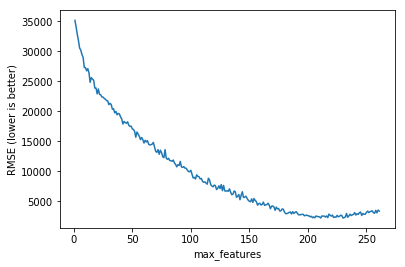

In [80]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
sns.mpl.pyplot.plot(feature_range, RMSE_scores)
sns.mpl.pyplot.xlabel('max_features')
sns.mpl.pyplot.ylabel('RMSE (lower is better)')

In [82]:
# list of values to try for max_features
feature_range = range(1, len(house_data_engineered_col)+1)

# list to store the average RMSE for each value of max_features
RMSE_scores = []

for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=220, bootstrap=True, 
                                  oob_score=True, max_features=feature, random_state=1234)
    rfreg.fit(X_train_pca,y_train)
    preds = rfreg.predict(X_test_pca)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    RMSE_scores.append(rmse)

Text(0,0.5,u'RMSE (lower is better)')

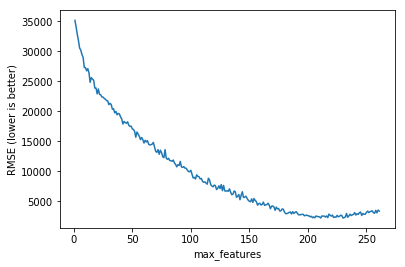

In [83]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
sns.mpl.pyplot.plot(feature_range, RMSE_scores)
sns.mpl.pyplot.xlabel('max_features')
sns.mpl.pyplot.ylabel('RMSE (lower is better)')

In [ ]:
rfreg_best = RandomForestRegressor(
    n_estimators=200,
    max_features=7,
    bootstrap=True,
    oob_score=True,
    random_state=123)
rfreg_best.fit(X_train, y_train)
preds = rfreg_best.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("Best RMSE:", rmse)

# compute feature importances
pd.DataFrame({
    'feature': house_data_engineered_col,
    'importance': rfreg_best.feature_importances_
}).sort_values(
    by='importance', ascending=False)